In [23]:
%matplotlib inline
from collections import Counter
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import microhapdb
import numpy
import pandas
import seaborn

In [2]:
microhapdb.__version__

'0.5'

In [13]:
def overlap(start1, end1, start2, end2):
    return start1 < end2 and end1 > start2

In [4]:
def distance(start1, end1, start2, end2):
    if overlap(start1, end1, start2, end2):
        return -1
    if start1 > start2:
        start1, end1, start2, end2 = start2, end2, start1, end1
    return start2 - end1

In [5]:
m = microhapdb.markers.copy()
m['Start'] = m.Offsets.apply(lambda x: min(map(int, x.split(','))))
m['End'] = m.Offsets.apply(lambda x: max(map(int, x.split(','))) + 1)
m['Length'] = m.apply(lambda x: x.End - x.Start, axis=1)

In [29]:
distances = list()
overlapping = set()
pairs = list()
for chrom in sorted(m.Chrom.unique()):
    cm = m[m.Chrom == chrom]
    for x, rowi in cm.iterrows():
        dist = None
        for y, rowj in cm.iterrows():
            if x == y:
                continue
            tempdist = distance(rowi.Start, rowi.End, rowj.Start, rowj.End)
            if tempdist < 0:
                overlapping.add(rowi.Name)
                if x < y:
                    pairs.append(tuple(sorted((rowi.Source, rowj.Source))))
                continue
            if dist is None or tempdist < dist:
                dist = tempdist
        assert dist is not None, rowi
        distances.append(dist)

In [7]:
distlist = [d / 1e6 for d in distances if d < 25e6]
len(distlist)

415

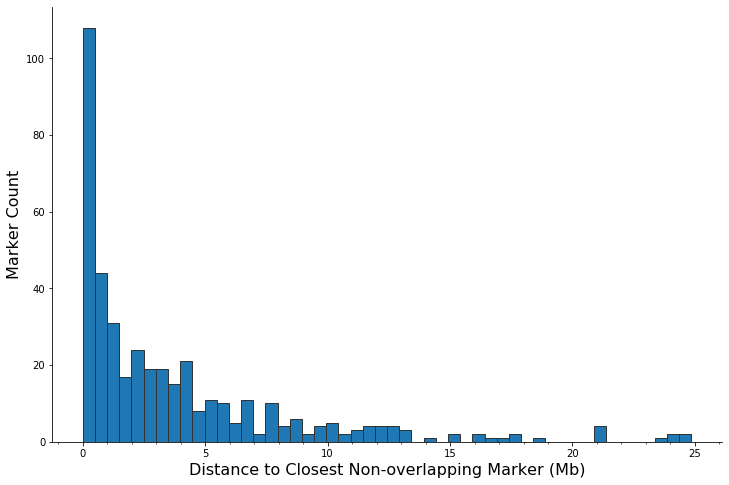

In [8]:
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')
plt.hist(distlist, bins=50, edgecolor='#333333')
axis = plt.gca()
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.xaxis.set_minor_locator(MultipleLocator(1))
axis.set_xlabel('Distance to Closest Non-overlapping Marker (Mb)', fontsize=16)
axis.set_ylabel('Marker Count', fontsize=16)
fig.savefig('marker-pw-dist.pdf')

In [9]:
total = len(distances)
lt1Mb = sum([1 for d in distances if d < 1e6])
lt100kb = sum([1 for d in distances if d < 1e5])

print('< 1Mb:', lt1Mb, '/', total, ',', lt1Mb / total)
print('< 1Mb:', lt100kb, '/', total, ',', lt100kb / total)

< 1Mb: 152 / 417 , 0.3645083932853717
< 1Mb: 53 / 417 , 0.12709832134292565


In [17]:
m[m.Name.isin(overlapping)].Source.value_counts()

ALFRED                            44
ISFG2019:P597                     40
10.1016/j.legalmed.2015.06.003     1
10.1016/j.fsigen.2019.102213       1
10.1016/j.fsigen.2018.05.008       1
Name: Source, dtype: int64

In [21]:
pandas.set_option('display.max_rows', None)
m[m.Name.isin(overlapping)]

,Name,PermID,Reference,Chrom,Offsets,AvgAe,In,Source,Start,End,Length
9,mh01KK-205,MHDBM-1f7eaca2,GRCh38,chr1,"18396197,18396218,18396306,18396351",4.0654,0.0717,ALFRED,18396197,18396352,155
10,mh01AT-02,MHDBM-6ba6d44e,GRCh38,chr1,"18396306,18396351",2.5324,0.0338,ISFG2019:P597,18396306,18396352,46
19,mh01KK-211,MHDBM-6adc547b,GRCh38,chr1,"161985865,161985967,161986013",2.2742,0.1706,ALFRED,161985865,161986014,149
20,mh01AT-03,MHDBM-be82bac2,GRCh38,chr1,"161985967,161985984,161986013",2.7654,0.1143,ISFG2019:P597,161985967,161986014,47
27,mh01NK-001,MHDBM-47c3e27c,GRCh38,chr1,"230684604,230684831,230684858,230684883",3.2924,0.1511,ALFRED,230684604,230684884,280
28,mh01NH-04,MHDBM-0f7da26c,GRCh38,chr1,"230684831,230684858,230684883",3.0552,0.1005,10.1016/j.legalmed.2015.06.003,230684831,230684884,53
29,mh01AT-04,MHDBM-0f7da26c,GRCh38,chr1,"230684831,230684858,230684883",3.0552,0.1005,ISFG2019:P597,230684831,230684884,53
53,mh02KK-134,MHDBM-daea3d38,GRCh38,chr2,"160222899,160222923,160222938,160223002",5.2060,0.2759,ALFRED,160222899,160223003,104
54,mh02AT-05,MHDBM-c3feaba8,GRCh38,chr2,"160222899,160222923,160222938",4.5544,0.2000,ISFG2019:P597,160222899,160222939,40
59,mh02KK-136,MHDBM-eb83984f,GRCh38,chr2,"227227672,227227689,227227742",4.0513,0.1190,ALFRED,227227672,227227743,71


In [30]:
Counter(pairs)

Counter({('ALFRED', 'ISFG2019:P597'): 40,
         ('10.1016/j.legalmed.2015.06.003', 'ALFRED'): 1,
         ('10.1016/j.legalmed.2015.06.003', 'ISFG2019:P597'): 1,
         ('10.1016/j.fsigen.2018.05.008', '10.1016/j.fsigen.2019.102213'): 1,
         ('ALFRED', 'ALFRED'): 2})

In [31]:
!microhapdb marker -h

usage: microhapdb marker [-h] [--format {table,detail,fasta}] [--notrunc]
                         [--delta D] [--min-length L] [-p FILE] [-r RGN]
                         [--query STRING]
                         [id [id ...]]

≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠
 __  __ _            _  _           ___  ___
|  \/  (_)__ _ _ ___| || |__ _ _ __|   \| _ )
| |\/| | / _| '_/ _ \ __ / _` | '_ \ |) | _ \
|_|  |_|_\__|_| \___/_||_\__,_| .__/___/|___/
                              |_|
≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠≠

Retrieve marker records by identifier or query

positional arguments:
  id                    marker identifier

optional arguments:
  -h, --help            show this help message and exit
  --format {table,detail,fasta}
  --notrunc             disable truncation of tabular results
  --delta D             extend D nucleotides beyond the marker extent when
                        computing amplicon boundaries (

In [32]:
len(m.PermID)

417

In [33]:
len(m.PermID.unique())

406

In [38]:
dups = [pid for (pid, count) in Counter(m.PermID).items() if count > 1]

In [39]:
len(dups)

11

In [40]:
m[m.PermID.isin(dups)]

,Name,PermID,Reference,Chrom,Offsets,AvgAe,In,Source,Start,End,Length
28,mh01NH-04,MHDBM-0f7da26c,GRCh38,chr1,"230684831,230684858,230684883",3.0552,0.1005,10.1016/j.legalmed.2015.06.003,230684831,230684884,53
29,mh01AT-04,MHDBM-0f7da26c,GRCh38,chr1,"230684831,230684858,230684883",3.0552,0.1005,ISFG2019:P597,230684831,230684884,53
59,mh02KK-136,MHDBM-eb83984f,GRCh38,chr2,"227227672,227227689,227227742",4.0513,0.1190,ALFRED,227227672,227227743,71
60,mh02AT-07,MHDBM-eb83984f,GRCh38,chr2,"227227672,227227689,227227742",4.0513,0.1190,ISFG2019:P597,227227672,227227743,71
69,mh03KK-007,MHDBM-095cdb0b,GRCh38,chr3,"46310863,46310892",2.3682,0.1009,ALFRED,46310863,46310893,30
70,mh03AT-08,MHDBM-095cdb0b,GRCh38,chr3,"46310863,46310892",2.3682,0.1009,ISFG2019:P597,46310863,46310893,30
82,mh04KK-010,MHDBM-07c8d144,GRCh38,chr4,"1985210,1985244",2.9226,0.1306,ALFRED,1985210,1985245,35
83,mh04AT-10,MHDBM-07c8d144,GRCh38,chr4,"1985210,1985244",2.9226,0.1306,ISFG2019:P597,1985210,1985245,35
112,mh05KK-022,MHDBM-2f4b3f5c,GRCh38,chr5,"9619792,9619823",2.4671,0.0964,ALFRED,9619792,9619824,32
113,mh05AT-14,MHDBM-2f4b3f5c,GRCh38,chr5,"9619792,9619823",2.4671,0.0964,ISFG2019:P597,9619792,9619824,32


In [41]:
max(distances)

56086533

In [42]:
min(distances)

143